<a href="https://colab.research.google.com/github/samuelbahia/Report/blob/master/Projeto_Final_IBMEC_DSBI2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-21a75c5d5ac6>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=central_data, x="Tipo_Atendimento", palette="viridis")


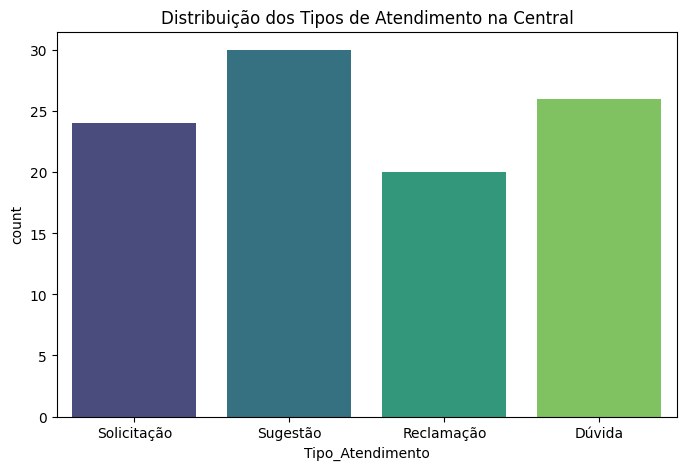

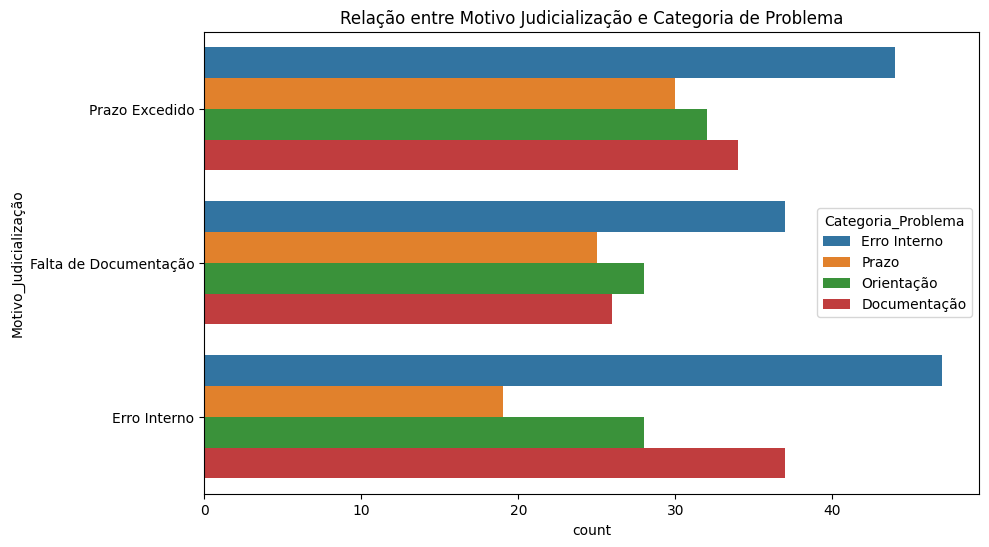

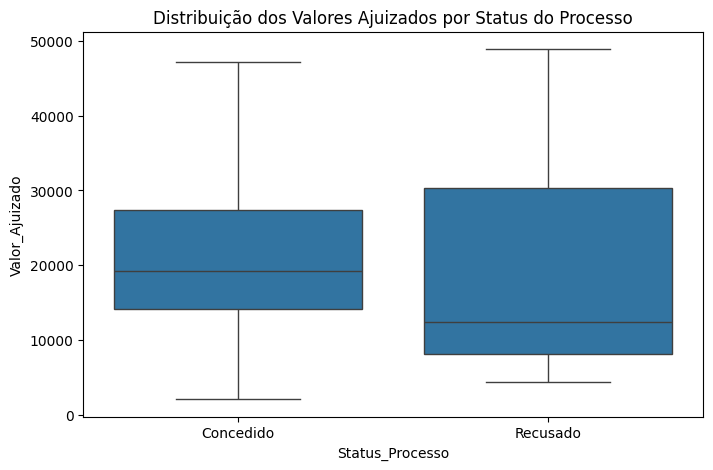

Percentual de Processos Concedidos vs Recusados:
Status_Processo
Recusado     60.0
Concedido    40.0
Name: proportion, dtype: float64

Problemas Mais Frequentes na Central por Estado:
Categoria_Problema  Documentação  Erro Interno  Orientação  Prazo
UF                                                               
BA                             7             7           2      1
MG                             5             3           7      6
RJ                             2             6           7      3
RS                             4             7           4      5
SP                             8             7           4      5


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulação de dados da Central de Atendimento e Ouvidoria
def simulate_central_data(num_records=100):
    np.random.seed(42)  # Para reprodutibilidade
    data = {
        "Ticket_ID": range(1, num_records + 1),
        "Tipo_Atendimento": np.random.choice(["Reclamação", "Dúvida", "Solicitação", "Sugestão"], num_records),
        "Categoria_Problema": np.random.choice(["Documentação", "Prazo", "Erro Interno", "Orientação"], num_records),
        "Data_Registro": pd.date_range(start="2024-01-01", periods=num_records, freq="D"),
        "Status": np.random.choice(["Resolvido", "Pendente"], num_records, p=[0.7, 0.3]),
        "UF": np.random.choice(["SP", "RJ", "MG", "RS", "BA"], num_records),
    }
    return pd.DataFrame(data)

# Gerando os dados simulados
central_data = simulate_central_data()

# 2. Carregando os dados dos processos judicializados (simulados)
processos_data = pd.DataFrame({
    "Número_Processo": range(1, 21),
    "UF": np.random.choice(["SP", "RJ", "MG", "RS", "BA"], 20),
    "Motivo_Judicialização": np.random.choice(["Falta de Documentação", "Erro Interno", "Prazo Excedido"], 20),
    "Valor_Ajuizado": np.random.randint(1000, 50000, 20),
    "Status_Processo": np.random.choice(["Concedido", "Recusado"], 20, p=[0.3, 0.7]),
})

# Explicação:
# - Os dados simulados da Central de Atendimento incluem informações sobre o tipo de atendimento e problemas relatados.
# - Os dados dos processos judicializados contêm detalhes sobre os motivos e valores envolvidos.

# 3. Cruzamento dos dados entre a Central de Atendimento e Processos Judicializados
merged_data = pd.merge(
    central_data,
    processos_data,
    on="UF",
    how="inner"
)

# Explicação:
# - O cruzamento é feito com base no estado (UF), para correlacionar problemas administrativos com judicializações.

# 4. Análise exploratória e visualização dos dados

# Contagem por tipo de atendimento na Central
plt.figure(figsize=(8, 5))
sns.countplot(data=central_data, x="Tipo_Atendimento", palette="viridis")
plt.title("Distribuição dos Tipos de Atendimento na Central")
plt.show()

# Relação entre Motivo Judicialização e Categoria de Problema
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, y="Motivo_Judicialização", hue="Categoria_Problema")
plt.title("Relação entre Motivo Judicialização e Categoria de Problema")
plt.show()

# Distribuição dos valores ajuizados por status do processo
plt.figure(figsize=(8, 5))
sns.boxplot(data=processos_data, x="Status_Processo", y="Valor_Ajuizado")
plt.title("Distribuição dos Valores Ajuizados por Status do Processo")
plt.show()

# Explicação:
# - As visualizações ajudam a identificar padrões nos dados.
# - Por exemplo, podemos explorar se há uma relação entre categorias administrativas e os motivos das judicializações.

# 5. Insights adicionais

# Percentual de processos concedidos vs recusados
status_counts = processos_data["Status_Processo"].value_counts(normalize=True) * 100
print("Percentual de Processos Concedidos vs Recusados:")
print(status_counts)

# Problemas mais frequentes na Central por estado (UF)
problemas_por_uf = central_data.groupby("UF")["Categoria_Problema"].value_counts().unstack()
print("\nProblemas Mais Frequentes na Central por Estado:")
print(problemas_por_uf)

